In [20]:
import pandas as pd

# Load the Excel file
file_path = './Microscopy_1.xlsx'
xls = pd.ExcelFile(file_path)

# Print the sheet names 
sheet_names = xls.sheet_names
sheet_names


['Sheet1']

In [21]:
# Preview the first few rows of the sheet to understand its layout
sheet_data = pd.read_excel(xls, 'Sheet1')
sheet_data.head()


,Material,Cube,Line,Mode
0,SS,3,1,C
1,SS,3,2,C
2,SS,3,3,C
3,SS,3,4,TK
4,SS,3,5,K


In [22]:
# Initialize a dictionary to hold the data
materials_dict = {}

# Iterate through the dataframe to populate the dictionary
for index, row in sheet_data.iterrows():
    material = row['Material']
    
    # Create a dictionary for the current row (excluding the material as it's a key)
    row_dict = {'Cube': row['Cube'], 'Line': row['Line'], 'Mode': row['Mode']}
    
    # If the material is not yet in the dictionary, add it with the current row_dict as the first element of a list
    if material not in materials_dict:
        materials_dict[material] = [row_dict]
    else:
        # If the material already exists, append the current row_dict to its list
        materials_dict[material].append(row_dict)

materials_dict


{'SS': [{'Cube': 3, 'Line': 1, 'Mode': 'C'},
  {'Cube': 3, 'Line': 2, 'Mode': 'C'},
  {'Cube': 3, 'Line': 3, 'Mode': 'C'},
  {'Cube': 3, 'Line': 4, 'Mode': 'TK'},
  {'Cube': 3, 'Line': 5, 'Mode': 'K'},
  {'Cube': 3, 'Line': 6, 'Mode': 'C'},
  {'Cube': 3, 'Line': 7, 'Mode': 'C'},
  {'Cube': 3, 'Line': 8, 'Mode': 'K'},
  {'Cube': 3, 'Line': 9, 'Mode': 'C'},
  {'Cube': 3, 'Line': 10, 'Mode': 'C'},
  {'Cube': 4, 'Line': 1, 'Mode': 'T'},
  {'Cube': 4, 'Line': 2, 'Mode': 'T'},
  {'Cube': 4, 'Line': 3, 'Mode': 'C'},
  {'Cube': 4, 'Line': 4, 'Mode': 'C'},
  {'Cube': 4, 'Line': 5, 'Mode': 'TK'},
  {'Cube': 4, 'Line': 6, 'Mode': 'K'},
  {'Cube': 4, 'Line': 7, 'Mode': 'C'},
  {'Cube': 4, 'Line': 8, 'Mode': 'C'},
  {'Cube': 4, 'Line': 9, 'Mode': 'C'},
  {'Cube': 4, 'Line': 10, 'Mode': 'T'},
  {'Cube': 5, 'Line': 1, 'Mode': 'C'},
  {'Cube': 5, 'Line': 2, 'Mode': 'C'},
  {'Cube': 5, 'Line': 3, 'Mode': 'C'},
  {'Cube': 5, 'Line': 4, 'Mode': 'T'},
  {'Cube': 5, 'Line': 5, 'Mode': 'C'},
  {'Cube': 5, '

In [23]:
# Load the new Excel file
new_file_path = './experiment_parameters_ref.xlsx'
new_xls = pd.ExcelFile(new_file_path)

# Print the sheet names 
new_sheet_names = new_xls.sheet_names
new_sheet_names


['Cube1', 'Cube2', 'Cube3', 'Cube4', 'Cube5', 'Cube6', 'Cube7', 'Cube8']

In [24]:
# Preview the first few rows of the first cube sheet to confirm the column names and understand the data layout
cube1_data = pd.read_excel(new_xls, 'Cube1')
cube1_data.head()


,Speed (mm/s),Power (W),Power perc (%),#
0,1050,90,18,1
1,800,90,18,2
2,1800,120,24,3
3,1300,120,24,4
4,550,120,24,5


In [25]:
# Function to add speed and power data to the existing dictionary
def update_dict_with_speed_power(existing_dict, xls, sheet_names):
    updated_dict = existing_dict.copy()
    
    for sheet_name in sheet_names:
        # Determine cube number from the sheet name
        cube_number = int(sheet_name.replace('Cube', ''))
        data = pd.read_excel(xls, sheet_name)
        
        for _, row in data.iterrows():
            line_number = row['#']
            speed = row['Speed (mm/s)']
            power = row['Power (W)']
            
            # Iterate through the existing dictionary to find the matching material, cube, and line
            for material in updated_dict:
                for entry in updated_dict[material]:
                    if entry['Cube'] == cube_number and entry['Line'] == line_number:
                        # Update the entry with speed and power
                        entry['Speed'] = speed
                        entry['Power'] = power
    return updated_dict

# Update the dictionary with speed and power data from the new Excel file
updated_materials_dict = update_dict_with_speed_power(materials_dict, new_xls, new_sheet_names)

updated_materials_dict

{'SS': [{'Cube': 3, 'Line': 1, 'Mode': 'C', 'Speed': 1550, 'Power': 90},
  {'Cube': 3, 'Line': 2, 'Mode': 'C', 'Speed': 1300, 'Power': 120},
  {'Cube': 3, 'Line': 3, 'Mode': 'C', 'Speed': 1050, 'Power': 90},
  {'Cube': 3, 'Line': 4, 'Mode': 'TK', 'Speed': 300, 'Power': 120},
  {'Cube': 3, 'Line': 5, 'Mode': 'K', 'Speed': 550, 'Power': 120},
  {'Cube': 3, 'Line': 6, 'Mode': 'C', 'Speed': 1050, 'Power': 120},
  {'Cube': 3, 'Line': 7, 'Mode': 'C', 'Speed': 1800, 'Power': 105},
  {'Cube': 3, 'Line': 8, 'Mode': 'K', 'Speed': 300, 'Power': 105},
  {'Cube': 3, 'Line': 9, 'Mode': 'C', 'Speed': 800, 'Power': 90},
  {'Cube': 3, 'Line': 10, 'Mode': 'C', 'Speed': 1300, 'Power': 90},
  {'Cube': 4, 'Line': 1, 'Mode': 'T', 'Speed': 800, 'Power': 105},
  {'Cube': 4, 'Line': 2, 'Mode': 'T', 'Speed': 800, 'Power': 120},
  {'Cube': 4, 'Line': 3, 'Mode': 'C', 'Speed': 1050, 'Power': 105},
  {'Cube': 4, 'Line': 4, 'Mode': 'C', 'Speed': 1550, 'Power': 105},
  {'Cube': 4, 'Line': 5, 'Mode': 'TK', 'Speed': 55

In [26]:
import pickle

def save_dictionary(dictionary, filename):
    with open(filename, 'wb') as file:
        pickle.dump(dictionary, file)
        
save_dictionary(updated_materials_dict, './GT')

In [27]:
def extract_info_by_material_and_cubes(material, cubes, data_dict):
    """
    Extract information by material and specified cubes.

    Parameters:
    - material (str): The material to filter by.
    - cubes (list of int): The cube numbers to filter by.
    - data_dict (dict): The dictionary containing the data.

    Returns:
    - dict: A dictionary with keys 'Modes', 'Speeds', 'Power', containing lists of modes, speeds, and powers, respectively.
    """
    extracted_info = {'Modes': [], 'Speeds': [], 'Power': []}

    # Filter the entries for the specified material and cubes
    for entry in data_dict[material]:
        if entry['Cube'] in cubes:
            extracted_info['Modes'].append(entry['Mode'])
            extracted_info['Speeds'].append(entry['Speed'])
            extracted_info['Power'].append(entry['Power'])

    return extracted_info



In [28]:
updated_materials_dict

{'SS': [{'Cube': 3, 'Line': 1, 'Mode': 'C', 'Speed': 1550, 'Power': 90},
  {'Cube': 3, 'Line': 2, 'Mode': 'C', 'Speed': 1300, 'Power': 120},
  {'Cube': 3, 'Line': 3, 'Mode': 'C', 'Speed': 1050, 'Power': 90},
  {'Cube': 3, 'Line': 4, 'Mode': 'TK', 'Speed': 300, 'Power': 120},
  {'Cube': 3, 'Line': 5, 'Mode': 'K', 'Speed': 550, 'Power': 120},
  {'Cube': 3, 'Line': 6, 'Mode': 'C', 'Speed': 1050, 'Power': 120},
  {'Cube': 3, 'Line': 7, 'Mode': 'C', 'Speed': 1800, 'Power': 105},
  {'Cube': 3, 'Line': 8, 'Mode': 'K', 'Speed': 300, 'Power': 105},
  {'Cube': 3, 'Line': 9, 'Mode': 'C', 'Speed': 800, 'Power': 90},
  {'Cube': 3, 'Line': 10, 'Mode': 'C', 'Speed': 1300, 'Power': 90},
  {'Cube': 4, 'Line': 1, 'Mode': 'T', 'Speed': 800, 'Power': 105},
  {'Cube': 4, 'Line': 2, 'Mode': 'T', 'Speed': 800, 'Power': 120},
  {'Cube': 4, 'Line': 3, 'Mode': 'C', 'Speed': 1050, 'Power': 105},
  {'Cube': 4, 'Line': 4, 'Mode': 'C', 'Speed': 1550, 'Power': 105},
  {'Cube': 4, 'Line': 5, 'Mode': 'TK', 'Speed': 55

In [29]:
material = 'SS'
cubes = [3, 4]
info = extract_info_by_material_and_cubes(material, cubes, updated_materials_dict)
info


{'Modes': ['C',
  'C',
  'C',
  'TK',
  'K',
  'C',
  'C',
  'K',
  'C',
  'C',
  'T',
  'T',
  'C',
  'C',
  'TK',
  'K',
  'C',
  'C',
  'C',
  'T'],
 'Speeds': [1550,
  1300,
  1050,
  300,
  550,
  1050,
  1800,
  300,
  800,
  1300,
  800,
  800,
  1050,
  1550,
  550,
  300,
  1800,
  1300,
  1550,
  550],
 'Power': [90,
  120,
  90,
  120,
  120,
  120,
  105,
  105,
  90,
  90,
  105,
  120,
  105,
  105,
  105,
  90,
  120,
  105,
  120,
  90]}

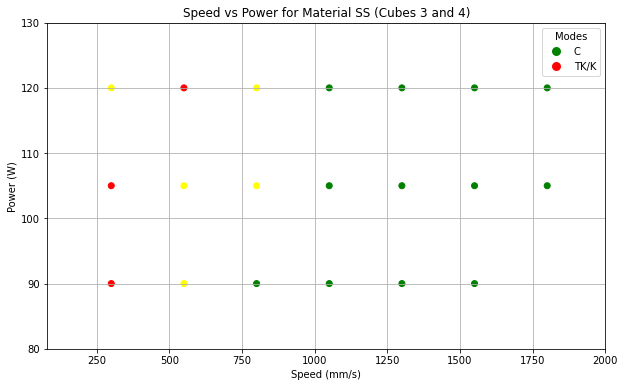

In [30]:
import matplotlib.pyplot as plt

# Extracted info for plotting
modes = info['Modes']
speeds = info['Speeds']
powers = info['Power']

# Assign colors based on modes
colors = ['green' if mode == 'C' else 'yellow' if 'T' in mode else 'red' for mode in modes]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(speeds, powers, color=colors)
plt.title(f'Speed vs Power for Material {material} (Cubes {cubes[0]} and {cubes[1]})')
plt.xlabel('Speed (mm/s)')
plt.ylabel('Power (W)')
plt.grid(True)

# Create a custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='C',
                          markerfacecolor='green', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='TK/K',
                          markerfacecolor='red', markersize=10)]
plt.legend(handles=legend_elements, title="Modes")

# Set x and y limits
plt.xlim(80, 2000)
plt.ylim(80, 130)

plt.show()



In [31]:
material = 'SS'
cubes = [7, 8]
info = extract_info_by_material_and_cubes(material, cubes, updated_materials_dict)
info

{'Modes': ['K',
  'C',
  'C',
  'K',
  'C',
  'T',
  'C',
  'K',
  'C',
  'C',
  'C',
  'K',
  'C',
  'C',
  'K',
  'C',
  'C',
  'C',
  'C',
  'T'],
 'Speeds': [300.0,
  1642.105263157895,
  1484.210526315789,
  378.9473684210526,
  931.578947368421,
  694.7368421052631,
  1168.421052631579,
  536.8421052631579,
  1721.052631578947,
  1563.157894736842,
  1326.315789473684,
  457.8947368421053,
  1010.526315789474,
  1800.0,
  615.7894736842105,
  1247.368421052632,
  852.6315789473684,
  1089.473684210526,
  1405.263157894737,
  773.6842105263158],
 'Power': [105.0,
  105.0,
  105.0,
  105.0,
  105.0,
  105.0,
  105.0,
  105.0,
  105.0,
  105.0,
  105.0,
  105.0,
  105.0,
  105.0,
  105.0,
  105.0,
  105.0,
  105.0,
  105.0,
  105.0]}

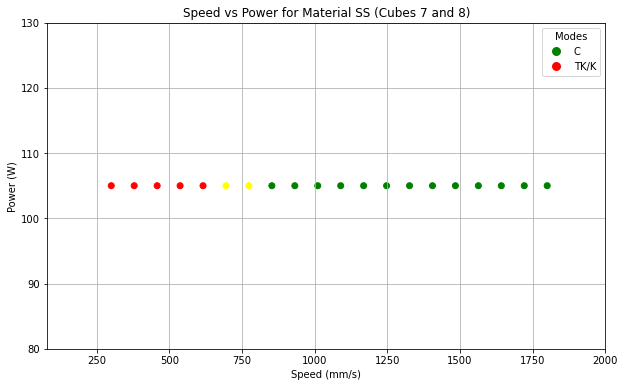

In [32]:
# Extracted info for plotting
modes = info['Modes']
speeds = info['Speeds']
powers = info['Power']

# Assign colors based on modes
colors = ['green' if mode == 'C' else 'yellow' if 'T' in mode else 'red' for mode in modes]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(speeds, powers, color=colors)
plt.title(f'Speed vs Power for Material {material} (Cubes {cubes[0]} and {cubes[1]})')
plt.xlabel('Speed (mm/s)')
plt.ylabel('Power (W)')
plt.grid(True)

# Create a custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='C',
                          markerfacecolor='green', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='TK/K',
                          markerfacecolor='red', markersize=10)]
plt.legend(handles=legend_elements, title="Modes")

# Set x and y limits
plt.xlim(80, 2000)
plt.ylim(80, 130)

plt.show()


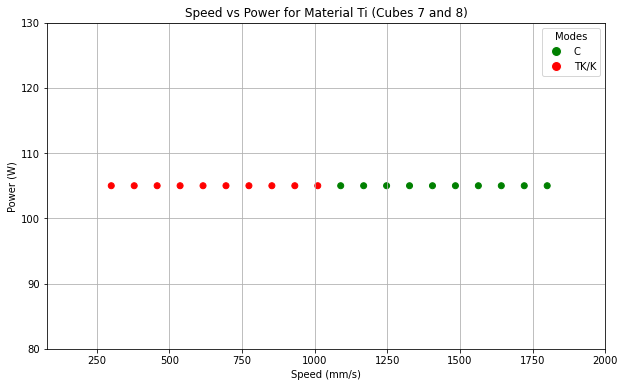

In [33]:
material = 'Ti'
cubes = [7, 8]

info = extract_info_by_material_and_cubes(material, cubes, updated_materials_dict)
# Extracted info for plotting
modes = info['Modes']
speeds = info['Speeds']
powers = info['Power']

# Assign colors based on modes
colors = ['green' if mode == 'C' else 'red' for mode in modes]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(speeds, powers, color=colors)
plt.title(f'Speed vs Power for Material {material} (Cubes {cubes[0]} and {cubes[1]})')
plt.xlabel('Speed (mm/s)')
plt.ylabel('Power (W)')
plt.grid(True)

# Create a custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='C',
                          markerfacecolor='green', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='TK/K',
                          markerfacecolor='red', markersize=10)]
plt.legend(handles=legend_elements, title="Modes")
# Set x and y limits
plt.xlim(80, 2000)
plt.ylim(80, 130)
plt.show()



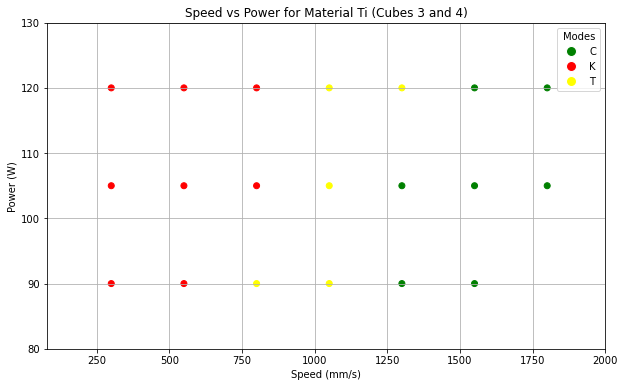

In [34]:
material = 'Ti'
cubes = [3,4]

info = extract_info_by_material_and_cubes(material, cubes, updated_materials_dict)
# Extracted info for plotting
modes = info['Modes']
speeds = info['Speeds']
powers = info['Power']

# Assign colors based on modes
colors = ['green' if mode == 'C' else 'yellow' if 'T' in mode else 'red' for mode in modes]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(speeds, powers, color=colors)
plt.title(f'Speed vs Power for Material {material} (Cubes {cubes[0]} and {cubes[1]})')
plt.xlabel('Speed (mm/s)')
plt.ylabel('Power (W)')
plt.grid(True)

# Create a custom legend
from matplotlib.lines import Line2D
legend_elements = [
  Line2D([0], [0], marker='o', color='w', label='C', markerfacecolor='green', markersize=10),
  Line2D([0], [0], marker='o', color='w', label='K', markerfacecolor='red', markersize=10),
  Line2D([0], [0], marker='o', color='w', label='T', markerfacecolor='yellow', markersize=10)
]
plt.legend(handles=legend_elements, title="Modes")
# Set x and y limits
plt.xlim(80, 2000)
plt.ylim(80, 130)
plt.show()



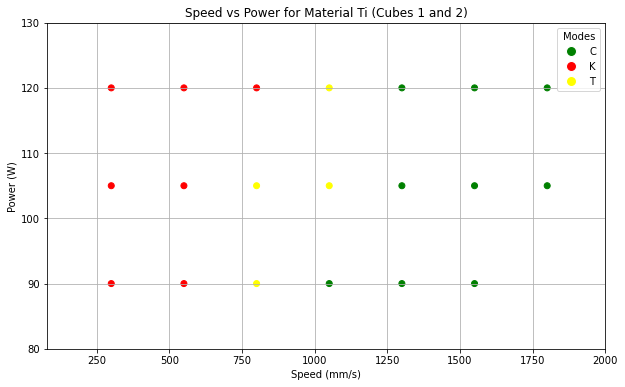

In [35]:
material = 'Ti'
cubes = [1,2]

info = extract_info_by_material_and_cubes(material, cubes, updated_materials_dict)
# Extracted info for plotting
modes = info['Modes']
speeds = info['Speeds']
powers = info['Power']

# Assign colors based on modes
colors = ['green' if mode == 'C' else 'yellow' if 'T' in mode else 'red' for mode in modes]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(speeds, powers, color=colors)
plt.title(f'Speed vs Power for Material {material} (Cubes {cubes[0]} and {cubes[1]})')
plt.xlabel('Speed (mm/s)')
plt.ylabel('Power (W)')
plt.grid(True)

# Create a custom legend
legend_elements = [
  Line2D([0], [0], marker='o', color='w', label='C', markerfacecolor='green', markersize=10),
  Line2D([0], [0], marker='o', color='w', label='K', markerfacecolor='red', markersize=10),
  Line2D([0], [0], marker='o', color='w', label='T', markerfacecolor='yellow', markersize=10)
]
plt.legend(handles=legend_elements, title="Modes")
# Set x and y limits
plt.xlim(80, 2000)
plt.ylim(80, 130)
plt.show()



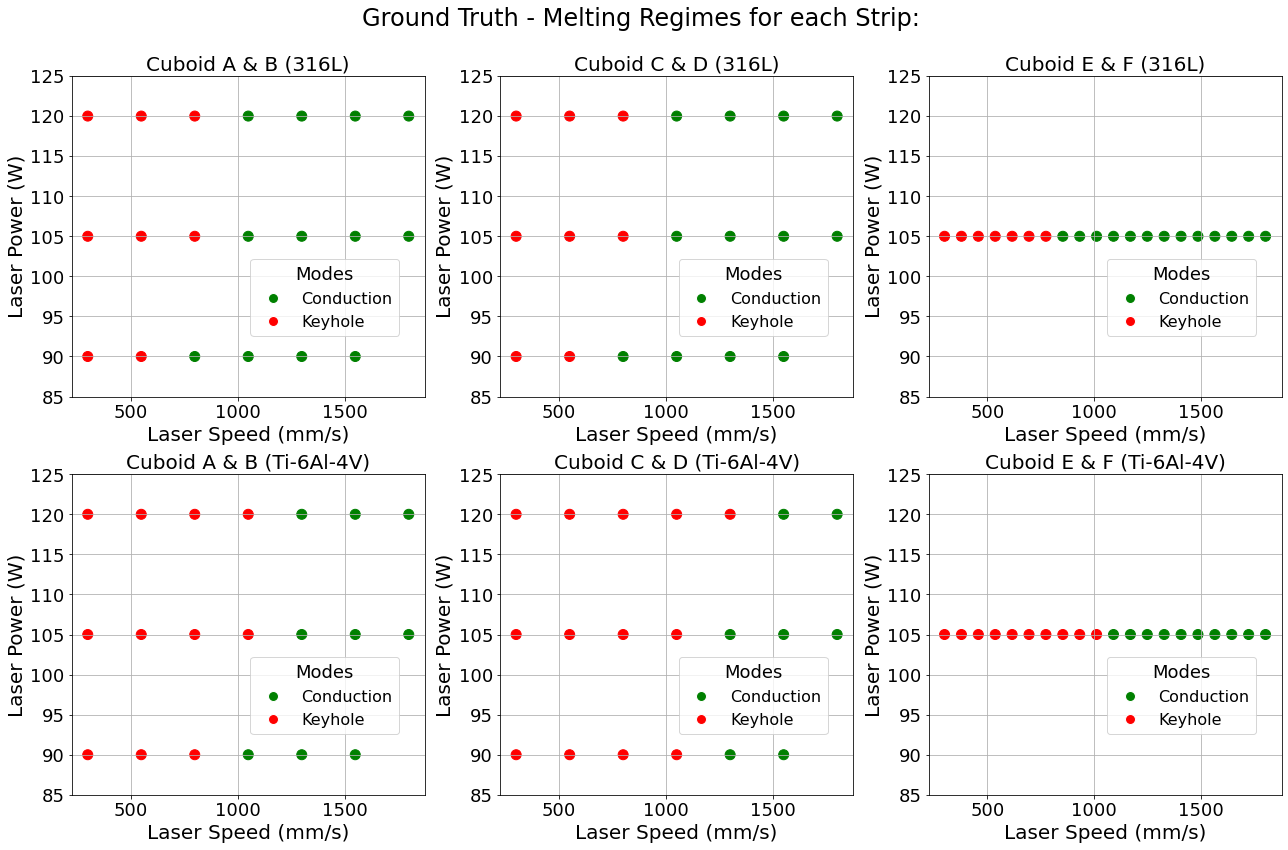

In [36]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os

# Create 'Figures' directory if it doesn't exist
os.makedirs('Figures', exist_ok=True)

# Define pairs of cubes to be considered together for each material
cube_pairs_316L = {
  'Cuboid A & B': [3, 4],
  'Cuboid C & D': [5, 6],
  'Cuboid E & F': [7, 8]
}

cube_pairs_Ti64 = {
  'Cuboid A & B': [1, 2],
  'Cuboid C & D': [3, 4],
  'Cuboid E & F': [7, 8]
}

# Function to create plot for each material
def create_plot(cube_pairs, material_name, axes, updated_materials_dict):
    for ax, (title, cubes) in zip(axes, cube_pairs.items()):
        if material_name == '316L':
            material = 'SS'
        elif material_name == 'Ti-6Al-4V':
            material = 'Ti'
        info = extract_info_by_material_and_cubes(material, cubes, updated_materials_dict)
        
        modes = info['Modes']
        speeds = info['Speeds']
        powers = info['Power']

        # Assign colors based on modes
        colors = ['green' if mode == 'C' else 'red' for mode in modes]

        ax.scatter(speeds, powers, c=colors, s=100)
        ax.set_title(f'{title} ({material_name})', fontsize=20)
        ax.set_xlabel('Laser Speed (mm/s)', fontsize=20)
        ax.set_ylabel('Laser Power (W)', fontsize=20)
        ax.set_ylim(85, 125)
        ax.grid(True)
        ax.tick_params(axis='both', which='major', labelsize=18)

        # Create a custom legend
        from matplotlib.lines import Line2D
        legend_elements = [
          Line2D([0], [0], marker='o', color='w', label='Conduction', markerfacecolor='green', markersize=10),
          Line2D([0], [0], marker='o', color='w', label='Keyhole', markerfacecolor='red', markersize=10)
        ]
        ax.legend(handles=legend_elements, title="Modes", fontsize=16, title_fontsize=18, 
                loc='lower right', bbox_to_anchor=(0.95, 0.165))

# Create a single figure with all plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Ground Truth - Melting Regimes for each Strip: ', fontsize=24)


# Create plots for both materials
create_plot(cube_pairs_316L, '316L', axes[0], updated_materials_dict)
create_plot(cube_pairs_Ti64, 'Ti-6Al-4V', axes[1], updated_materials_dict)

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust for main title

# Save the figure as PDF
with PdfPages('Figures/LPBF_melting_regimes_GT.pdf') as pdf:
    pdf.savefig(fig)

#plt.close()

In [37]:
# Define pairs of cubes for each material
cube_pairs = {
    '316L': {
        'Cuboid A & B': [3, 4],
        'Cuboid C & D': [5, 6],
        'Cuboid E & F': [7, 8]
    },
    'Ti-6Al-4V': {
        'Cuboid A & B': [1, 2],
        'Cuboid C & D': [3, 4],
        'Cuboid E & F': [7, 8]
    }
}
# Set options to display all rows
pd.set_option('display.max_rows', None)

# Create an empty list to store all data
all_data = []

# Iterate through materials and cuboid pairs
for material, pairs in cube_pairs.items():
    for cuboid_pair, cubes in pairs.items():
        material_code = 'SS' if material == '316L' else 'Ti'
        info = extract_info_by_material_and_cubes(material_code, cubes, updated_materials_dict)
        
        for mode, speed, power in zip(info['Modes'], info['Speeds'], info['Power']):
            all_data.append({
                'Material': material,
                'Cuboid Pair': cuboid_pair,
                'Mode': 'Conduction' if mode == 'C' else 'Keyhole',
                'Speed (mm/s)': int(speed),
                'Power (W)': int(power)
            })

# Create DataFrame
df = pd.DataFrame(all_data)

# Sort the DataFrame
df = df.sort_values(['Material', 'Cuboid Pair', 'Speed (mm/s)'])

df

,Material,Cuboid Pair,Mode,Speed (mm/s),Power (W)
3,316L,Cuboid A & B,Keyhole,300,120
7,316L,Cuboid A & B,Keyhole,300,105
15,316L,Cuboid A & B,Keyhole,300,90
4,316L,Cuboid A & B,Keyhole,550,120
14,316L,Cuboid A & B,Keyhole,550,105
19,316L,Cuboid A & B,Keyhole,550,90
8,316L,Cuboid A & B,Conduction,800,90
10,316L,Cuboid A & B,Keyhole,800,105
11,316L,Cuboid A & B,Keyhole,800,120
2,316L,Cuboid A & B,Conduction,1050,90


In [38]:
df

,Material,Cuboid Pair,Mode,Speed (mm/s),Power (W)
3,316L,Cuboid A & B,Keyhole,300,120
7,316L,Cuboid A & B,Keyhole,300,105
15,316L,Cuboid A & B,Keyhole,300,90
4,316L,Cuboid A & B,Keyhole,550,120
14,316L,Cuboid A & B,Keyhole,550,105
19,316L,Cuboid A & B,Keyhole,550,90
8,316L,Cuboid A & B,Conduction,800,90
10,316L,Cuboid A & B,Keyhole,800,105
11,316L,Cuboid A & B,Keyhole,800,120
2,316L,Cuboid A & B,Conduction,1050,90
